In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv('/home/walker/Downloads/diabetes.csv', delimiter=',')


In [11]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
x = data.drop("Outcome", axis=1)

In [13]:
y=np.ravel(data['Outcome'])

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5, random_state=50)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)

x_train = scaler.transform(x_train)

x_test = scaler.transform(x_test)


In [16]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(x_train, y_train)

y_predict = svc_model.predict(x_test)


In [17]:

from sklearn.metrics import classification_report, confusion_matrix

cm = np.array(confusion_matrix(y_test, y_predict, labels=[0,1]))

confusion = pd.DataFrame(cm, index=['Diabetic', 'Not Diabetic'], columns=['Predicted Diabetes', 'Predicted Healthy'])


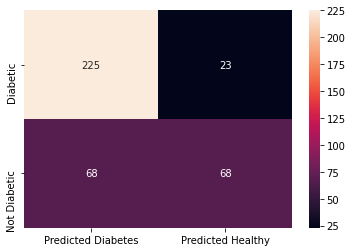

In [18]:
sns.heatmap(confusion,annot=True,fmt='g')

In [19]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       248
           1       0.75      0.50      0.60       136

    accuracy                           0.76       384
   macro avg       0.76      0.70      0.72       384
weighted avg       0.76      0.76      0.75       384

